<a href="https://colab.research.google.com/github/PriyankaDodeja/Health-Insurance-Cross-Sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
---

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**
---

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **Introduction**
---

Insurance is an agreement by which an individual obtains protection against any losses from an insurance company against the risks of damage, financial losses, damage, illness, or death in return for the payment of a specified premium. In this project, we have an insurance details dataset which contains a total of *381109 rows* and *12 features*. We have a categorical dependent variable *Response* which represents whether a customer is interested in vehicle insurance or not.
As an initial step, we checked for the null and duplicate values in our dataset. As there were no null and duplicate values present in our dataset, so data cleaning was not required. Further, we *normalized* the numerical columns for bringing them on the same scale.

In **Exploratory Data Analysis**, we categorized the Age as *YoungAge,* *MiddleAge, OldAge*.Then we categorized *Region_Code* and *Policy_Sales_Channel* to extract some valuable information from these features. We explored the independent features using some plots.

For **Feature selection**, we used Kendall's rank correlation coefficient for numerical features and for categorical features, we applied the Mutual Information technique.

For **Model prediction**, we used supervised machine learning algorithms like *Decision tree Classifier, AdaBoost, LightGBM, BaggingRegressor, NaiveBayes and Logistic regression*. Then applied hyperparameter tuning techniques to obtain better accuracy and to avoid overfitting.


*So, without any further delay let’s move ahead!*

# **Installing Dependencies**


---



In [ ]:
#@title
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 23.1 MB 1.8 MB/s 


# **Importing Libraries**
---

In [ ]:
#@title

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading Dataset**
---

Let's read the dataset we have to work on! We have a dataset of Health Insurance details.


In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Health Insurance Cross Sell Prediction/data/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

# **Data Wrangling**


---



- Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis.

- This process typically includes manually converting and mapping data from one raw form into another format to allow for more convenient consumption and organization of the data.

*Let's dive into the dataset!*

## **Health Insurance Dataset**
---

### **Columns:**
> **ID:** Unique identifier for the Customer.

> **Age:** Age of the Customer.

> **Gender:** Gender of the Customer.

>  **Driving_License:** 0 for customer not having DL, 1 for customer having DL.

> **Region_Code:** Unique code for the region of the customer.

> **Previously_Insured:** 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

> **Vehicle_Age:** Age of the vehicle.

> **Vehicle_Damage:** Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

> **Annual_Premium:** The amount customer needs to pay as premium in the year.

> **Policy_Sales_Channel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

> **Vintage:** Number of Days, Customer has been associated with the company.

> **Response (Dependent Feature):** 1 for Customer is interested, 0 for Customer is not interested.

*Let's deep dive into the dataset,*

In [ ]:
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Checking for Duplicate Data:**

In [ ]:
data_df[data_df.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


**Checking for Null Values:**

In [ ]:
data_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### **Observations:**
---
- As we can see, our data set contains 381109 rows and 12 columns.
- We do not have any **Null Values** in our dataset.
- We have 4 numeric and 5 categorical independent features.
- Our dependent feature is a categorical column (*Response*)

## **Data Cleaning and Refactoring**
---
Let's reformat and clean the data for smooth processing!

### **Finding Outliers**
---
*Let's take a look at the outliers (if any) in our dataset.*

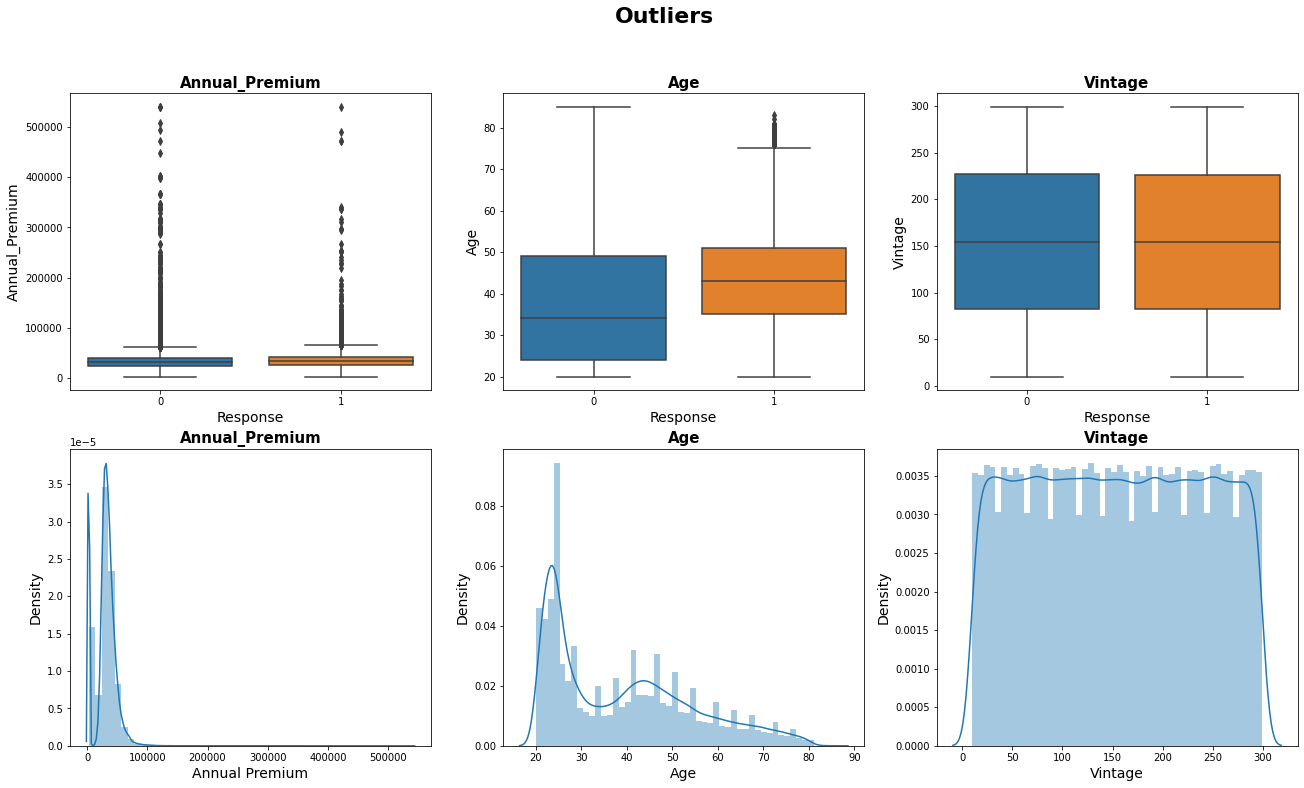

In [ ]:
def show_outliers(df):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(data_df)

*   From the above plot it can be implied that **Annual Premium** has a poitively skewed distribution.
*   From above we can also depict that **Vintage** has a approximatly uniform distribution.
* **Age** columns has some outliers but we are not going to treat them because it won't be affecting our result.


## **Outlier Treatment and Feature Scaling**


---

*   For Outlier treatment we will be applying quantile method.
*   For feature Scaling we will be using MinMaxScaler technique for Normlization.

In [ ]:
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(data_df)
scale_features(data_df)

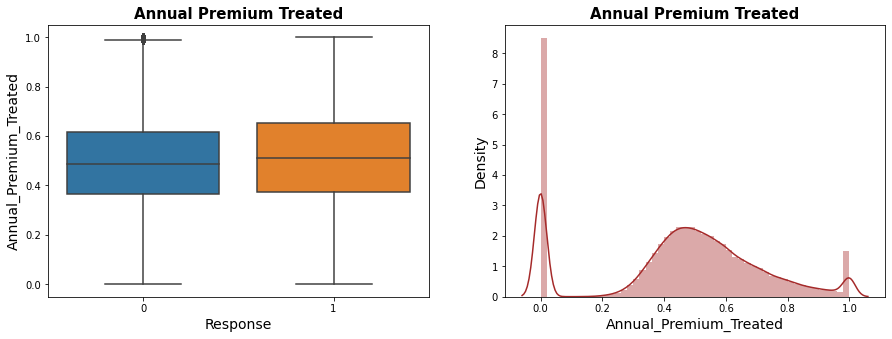

In [ ]:
def show_ann_prem_outliers(df):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(data_df)

*   From the above plots we can see that there are no more outliers in *Annual Premium*.

# **Exploratory Data Analysis**
---


In [ ]:
def show_distribution_numerical_features(df):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.countplot(ax = axes[0][0],x = 'Age', data = df, hue='Response')
    axes[0][0].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'Region_Code', data = df, hue='Response')
    axes[0][1].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Region_Code',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = df, hue='Response')
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.histplot(ax = axes[1][1], x = data_df['Vintage'],data = df, hue='Response')
    axes[1][1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Numerical Features', fontsize = 22, fontweight = 'bold' )



In [ ]:
def show_violin_distribution(df):

    sns.catplot(y = 'Age', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    plt.title('Age Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

    sns.catplot(y = 'Region_Code', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Region_Code', fontdict={'fontsize': 14})
    plt.title('Region Code Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

    sns.catplot(y = 'Policy_Sales_Channel', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    plt.title('Policy Sales Channel Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})



In [ ]:
def convert_numerical_to_categorical(df):
    # Categorizing Age feature
    df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

    # Categorizing Policy_Sales_Channel feature
    x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000<x<100000 else 'Channel_C' if 10000<x<=74000 else 'Channel_D') 
    res = dict(zip(x.keys(),x.values))
    df['Policy_Sales_Channel_Categorical'] = df['Policy_Sales_Channel'].map(res) 

    # Categorizing Region Code feature
    x = df['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
    res = dict(zip(x.keys(),x.values))
    df['Region_Code_Categorical'] = df['Region_Code'].map(res) 
    # df.Region_Code_Categorical.value_counts()

convert_numerical_to_categorical(data_df)

In [ ]:
def show_distribution_num_to_cat(df):    
    fig, axes = plt.subplots(1,3, figsize=(22,5))

    sns.countplot(ax = axes[0],x = 'Age_Group', data = df, hue='Response')
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age', fontdict={'fontsize': 15})

    sns.countplot(ax = axes[1],x = 'Region_Code_Categorical', data = df, hue='Response')
    axes[1].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel_Categorical', data = df, hue='Response')
    axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

    plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )



In [ ]:
def show_gender_response_relation(df):
    sns.catplot(x="Response", hue="Gender", kind="count",
                palette="pastel",
                data=df)
    plt.xlabel('Response', fontdict={'fontsize':12})
    plt.ylabel('Count',fontdict={'fontsize': 14})
    plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})
    


In [ ]:
def show_age_relations(df):
    fig, axes = plt.subplots(1,3, figsize=(25,8))
    sns.countplot(ax = axes[0],x="Response", hue="Age_Group", palette="pastel",
            data=df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
    sns.histplot(ax = axes[1],binwidth=0.5, x="Age_Group", 
                 hue="Previously_Insured", data=df, 
                 stat="count", multiple="stack")
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Age_Group V/S Previously_Insured', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
    sns.lineplot(ax = axes[2], x="Age",y="Annual_Premium_Treated",
                 data=df,hue="Gender")
    axes[2].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[2].set_title('Age V/S Annual Premium Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def vehicle_damage_distribution(df):
    fig = px.pie(df, values='Response', names='Vehicle_Damage', title='Vehicle Damage Distribution')
    fig.show()

In [ ]:
def show_vechile_damage_relations(df):
    fig, axes = plt.subplots(1,2, figsize=(22,8))
    sns.pointplot(ax = axes[0], x="Vehicle_Damage", y="Response", hue="Vehicle_Age", aspect=.7,
            kind="point", data=df)
    axes[0].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_title('Vehicle_Damage V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
    sns.pointplot(x = 'Vehicle_Damage', y = 'Annual_Premium_Treated', data=df, kind = 'point')
    axes[1].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Vehicle_Damage V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def vehicle_age_distribution(df):
    plt.figure(figsize=(10, 8))
    sns.countplot(x = 'Vehicle_Age', hue='Response', data = df, palette="Dark2")
    plt.xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    plt.title('Vehicle_Age', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def show_vehicle_age_relation(df):
    fig, axes = plt.subplots(2,3, figsize=(22,15))

    sns.barplot(ax = axes[0][0], x = 'Vehicle_Age', y='Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][1], y = 'Response', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df)
    axes[0][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][2], y = 'Response', x = 'Vehicle_Age', hue = 'Region_Code_Categorical', data=df)
    axes[0][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[1][0], y = 'Response', x = 'Vehicle_Age', hue = 'Policy_Sales_Channel_Categorical', data=df )
    axes[1][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.boxplot(ax = axes[1][1], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
    axes[1][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][2], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
    axes[1][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def show_annual_premium_relation(df):
    fig, axes = plt.subplots(2,2, figsize=(15,12))

    sns.pointplot(ax = axes[0][0], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[0][1], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.swarmplot(ax = axes[1][0], x = 'Response', y = 'Annual_Premium_Treated', data = df[:1000])
    axes[1][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][1], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[1][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def show_annual_premium_with_age_group(df):
    fig, axes = plt.subplots(1,2, figsize=(15,8))

    sns.barplot(ax = axes[0],y = 'Annual_Premium_Treated', x = 'Age_Group', data= data_df)
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[1], y = 'Annual_Premium_Treated', x = 'Age_Group', data= df)
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def show_age_annual_premium_relation(df):

    plt.figure(figsize = (14,9))
    plt.hexbin(data=data_df, x='Age',y='Annual_Premium_Treated',gridsize = 30, cmap ='Greens')
    plt.title('Annual Premium V/S Age', fontdict={'fontsize': 15, 'fontweight':'bold'})
    plt.ylabel('Annual Premium Treated',fontdict={'fontsize': 14})
    plt.xlabel('Age', fontdict={'fontsize': 14})
    plt.show()


    fig = px.scatter(df, x="Age", y="Annual_Premium",
                    color="Region_Code_Categorical",
                    size_max=180,opacity=0.3, title='Age V/S Annual Premium')
    fig.show()



In [ ]:
def age_group_distribution(df):
    fig, axes = plt.subplots(1,3, figsize=(15,6))

    colors = sns.color_palette('pastel')[0:4]
    explode = (0.01, 0.25, 0.01)
    axes[0].pie( x= df.groupby('Age_Group')['Response'].sum(),explode=explode, 
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%', 
            shadow=True);
    axes[0].set_title('with Response', fontsize = 15, fontweight ='bold', pad=15)

    axes[1].pie(x=df.groupby('Age_Group')['Annual_Premium'].sum(),explode=explode, 
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%', 
            shadow=True);
    axes[1].set_title('with Annual_Premium', fontsize = 15, fontweight ='bold', pad=15)

    axes[2].pie(x=df.groupby('Age_Group')['Previously_Insured'].sum(),explode=explode, 
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%', 
            shadow=True);
    axes[2].set_title('with Previously_Insured', fontsize = 15, fontweight ='bold', pad=15)

    plt.suptitle('Age Group Distribution',fontsize = 20, fontweight ='bold')



In [ ]:
def show_region_code_distribution(df):

    colors = sns.color_palette('pastel')[0:4]
    explode = (0.01, 0.01, 0.01)

    fig, axes = plt.subplots(1,2, figsize=(15,6))
    axes[0].pie(x=df.groupby('Region_Code_Categorical')['Vintage'].sum(),explode=explode, 
                labels=data_df['Region_Code_Categorical'].unique(), colors=colors,autopct='%1.1f%%', 
                shadow=True);
    axes[0].set_title('with Vintage', fontsize = 15, fontweight ='bold', pad=15)

    axes[1].pie(x=df.groupby('Region_Code_Categorical')['Annual_Premium_Treated'].sum(),explode=explode, 
                labels=data_df['Region_Code_Categorical'].unique(), colors=colors, autopct='%1.1f%%', 
                shadow=True);
    axes[1].set_title('with Annual_Premium', fontsize = 15, fontweight ='bold', pad=15)

    plt.suptitle('Region Code Distribution',fontsize = 15, fontweight ='bold')



In [ ]:
def show_policy_sales_channel_relation(df):

    fig, axes = plt.subplots(2,3, figsize=(22,15))

    sns.pointplot(ax = axes[0][0], x='Policy_Sales_Channel_Categorical', y='Vintage',data=df)
    axes[0][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][0].set_title('Policy_Sales_Channel V/S Vintage', 
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][1], x='Policy_Sales_Channel_Categorical', y='Annual_Premium_Treated',data=df)
    axes[0][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Policy_Sales_Channel V/S Annual_Premium_Treated', 
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    df['Policy_Sales_Channel_Categorical'].value_counts().plot(ax = axes[0][2] ,kind='barh')
    axes[0][2].set_xlabel(xlabel = 'Count', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][2].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.histplot(ax = axes[1][0],x="Policy_Sales_Channel_Categorical", hue="Response", data=df, stat="count", 
                 multiple="stack",binwidth=0.5)
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    groupPolicySalesBySum=df.groupby(by=["Policy_Sales_Channel_Categorical"]).sum().reset_index()
    sns.barplot(ax = axes[1][1], x="Policy_Sales_Channel_Categorical", y="Response", data=groupPolicySalesBySum)
    axes[1][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})


    sns.barplot(ax = axes[1][2], x='Policy_Sales_Channel_Categorical', y='Response', data=df, hue='Region_Code_Categorical')
    axes[1][2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][2].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})



In [ ]:
def count_each_categorical_feature(df):
    categorical_columns = ['Gender', 'Age_Group', 'Region_Code_Categorical', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 'Policy_Sales_Channel_Categorical']

    fig, axes =  plt.subplots(2, 7, figsize=(45, 15))
    for i in range(7):
        sns.countplot(data = df[df['Response']==1], x=categorical_columns[i], ax=axes[0][i])
        axes[0][i].set_xlabel(xlabel = categorical_columns[i], fontdict={'fontsize': 14})
        axes[0][i].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
        axes[0][i].set_title(categorical_columns[i], 
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

        sns.countplot(data = df[df['Response']==0], x=categorical_columns[i], ax=axes[1][i])

        axes[1][i].set_xlabel(xlabel = categorical_columns[i], fontdict={'fontsize': 14})
        axes[1][i].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
        axes[1][i].set_title(categorical_columns[i], 
                         fontdict={'fontsize': 15, 'fontweight':'bold'})



### **Exploring the Numerical Features**
---

We have 4 numerical features: Age, Policy_Sales_Channel, Region_Code, Vintage. Without any further delay, let's explore these features.


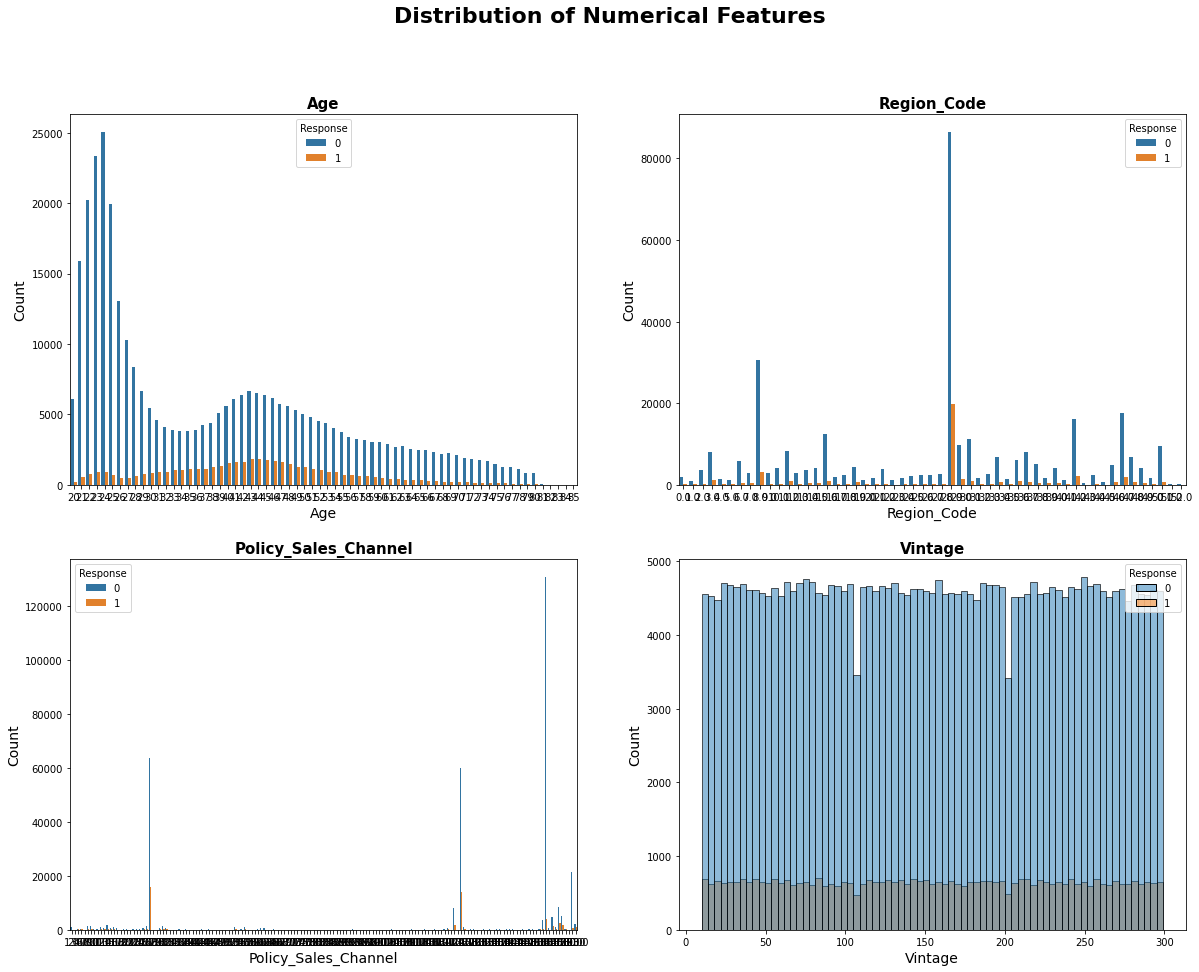

In [ ]:
show_distribution_numerical_features(data_df)

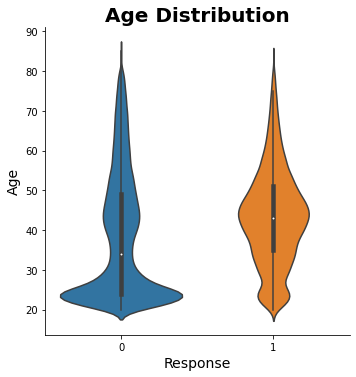

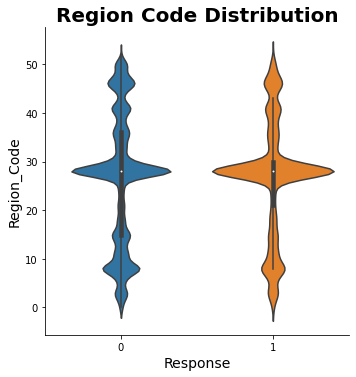

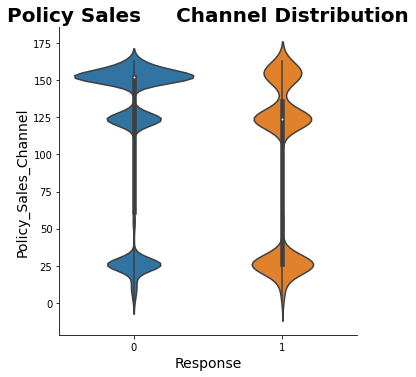

In [ ]:
show_violin_distribution(data_df)


**From the above graphical representation we can conclude on a few points:**
*   As we can see, we have a huge dispersion of data in Age feature, so in order to gain better insights on *Age* feature, we can convert it into categories as YoungAge, MiddleAge and OldAge.
*   Similarly, we can also categorize *Region Code* and *Policy_Sales_Channel*.



### **Converting Numerical Columns to Categorical**
---

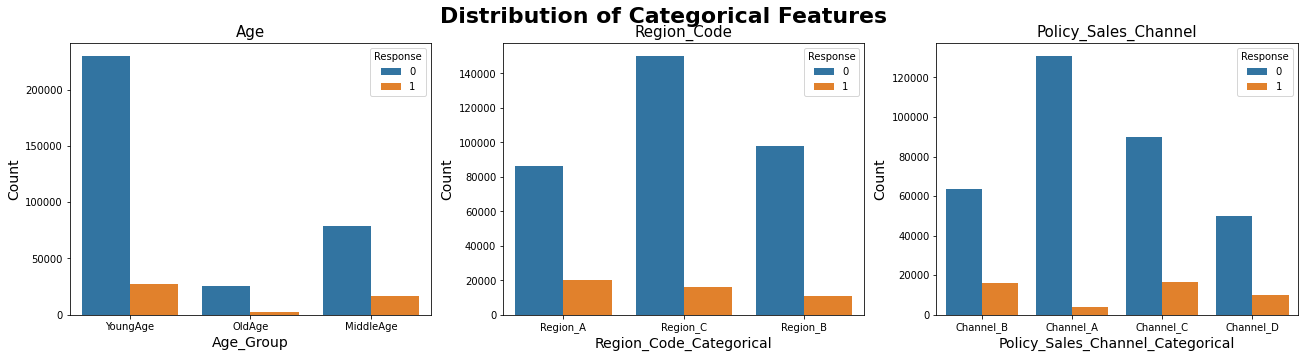

In [ ]:
show_distribution_num_to_cat(data_df)

**Observations:**
*   We can see that Customers belonging to *YoungAge* group are more likely not interested in taking the vehicle insurance.
*   Similarly, *Region_C* and *Channel_A* Customers has the highest chances of not taking the vehicle insurance.



In [ ]:
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated,Age_Group,Policy_Sales_Channel_Categorical,Region_Code_Categorical
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0.638245,0.716263,YoungAge,Channel_B,Region_A
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0.521510,0.598616,OldAge,Channel_B,Region_C
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0.601797,0.058824,MiddleAge,Channel_B,Region_A
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0.438540,0.667820,YoungAge,Channel_A,Region_C
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0.419591,0.100346,YoungAge,Channel_A,Region_B


### **Gender Distribution**
---


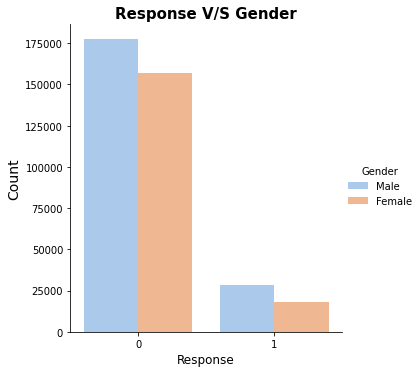

In [ ]:
show_gender_response_relation(data_df)

- For the above plot, we can say that the no. of male customers in our data set is higher than female customers.

### **Exploring the Age Feature**
---

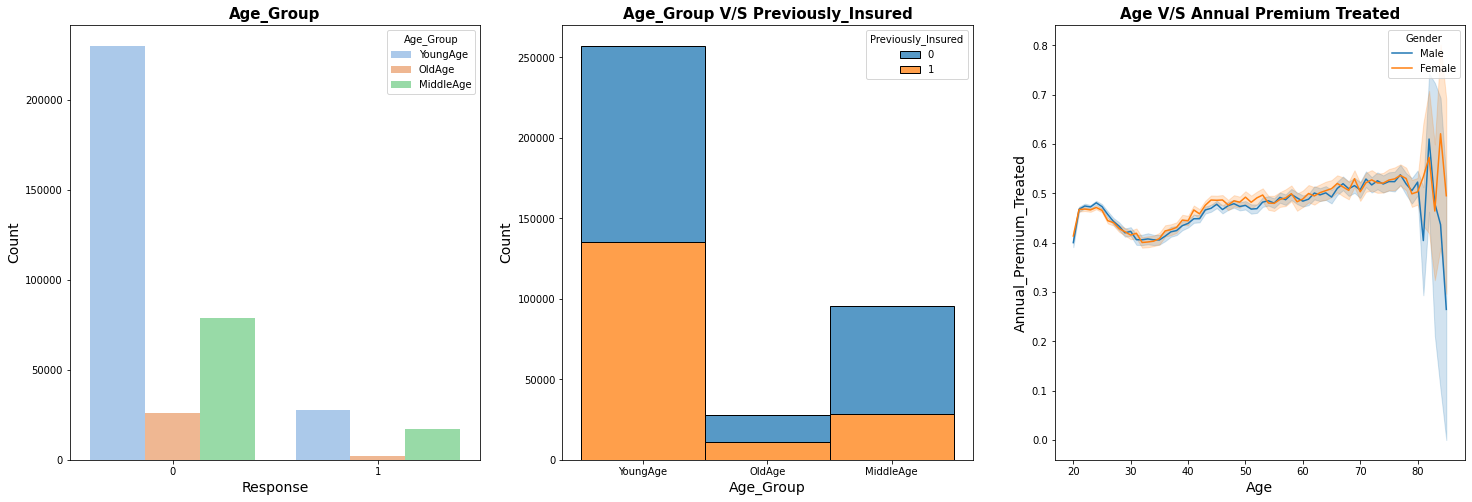

In [ ]:
show_age_relations(data_df)

**Observation:**
- From the first plot, we can see the *Responses* received from the different *Age_Group*.
- Second plot shows the number of customers of different age group having or not having vehicle insurance.
- We can say that the customers of *YoungAge* and *OldAge* are equally likely to have/not have vehicle insurance whereas customers of *MiddleAge* has the highest chances of not having a previously insured vehicle insurance.
- From the third plot, we can see the relation between *Age* and their *Annual_Premium* for both Male and Female customers.

### **Exploring Vehicle Damage**
---

In [ ]:
vehicle_damage_distribution(data_df)

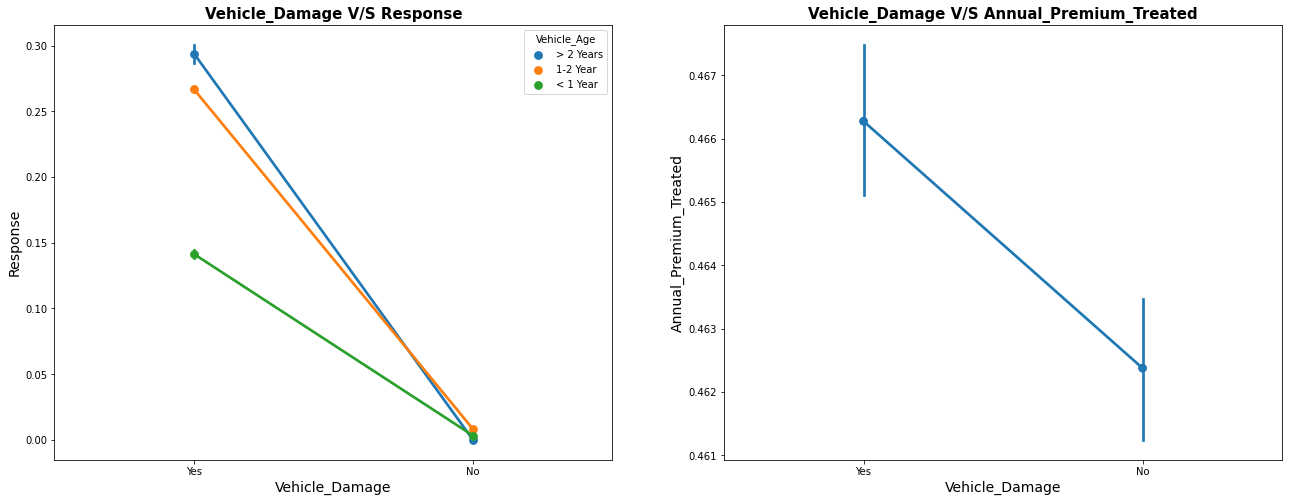

In [ ]:
show_vechile_damage_relations(data_df)

**Observations:**
- *Pie* plot shows the number of customers whose vehicle are damaged/not damaged and they took the insurance.
- From the first *point* plot, we can say that the chances of taking a vehicle insurance is higher if vehicle is damaged irrespective of *VehicleAge* group. With the increase in vehicle age, the chances of taking vehicle insurance also increases.
- The second point plot says that the *Annual_Premium* is comparetively higher for customers with damaged vehicle.

### **Exploring Vehicle Age Feature**
---

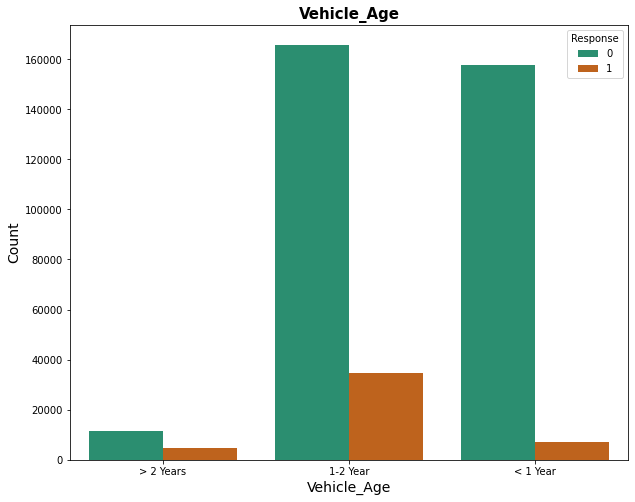

In [ ]:
vehicle_age_distribution(data_df)

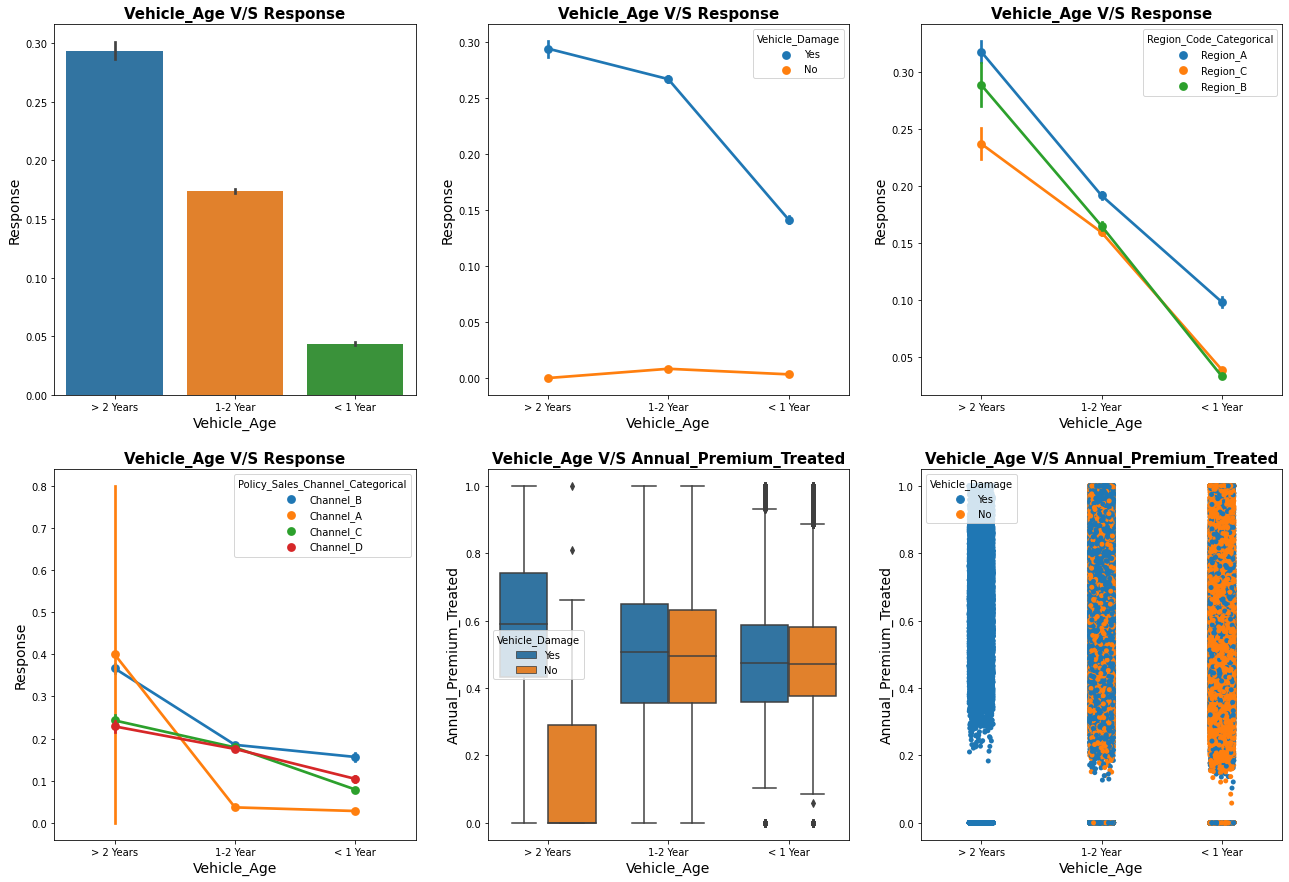

In [ ]:
show_vehicle_age_relation(data_df)

**Observations:**
- From the first bar plot, we can see the number of customers of *VehicleAge* group, took/didn't take the vehicle insurance.
- The first two plots of the above grid shows the possibility of taking vehicle insurance belonging to a particular *VehicleAge* group.
- The third plot of the above grid shows the possibility of taking vehicle insurance belonging to a particular *VehicleAge* group based on their *RegionCode*.
- The fourth plot of the above grid shows the possibility of taking vehicle insurance belonging to a particular *VehicleAge* group based on their *PolicySalesChannel* group.
- From the box plot of the above grid, we can see the relation of Vehicle_Age group and Annual_Premium based on their Vehicle_Damage response.
- The strip plot shows that the customers having vehicle age >2 Years have the higher chances of taking vehicle insurance.

### **Exploring Annual Premium**
---

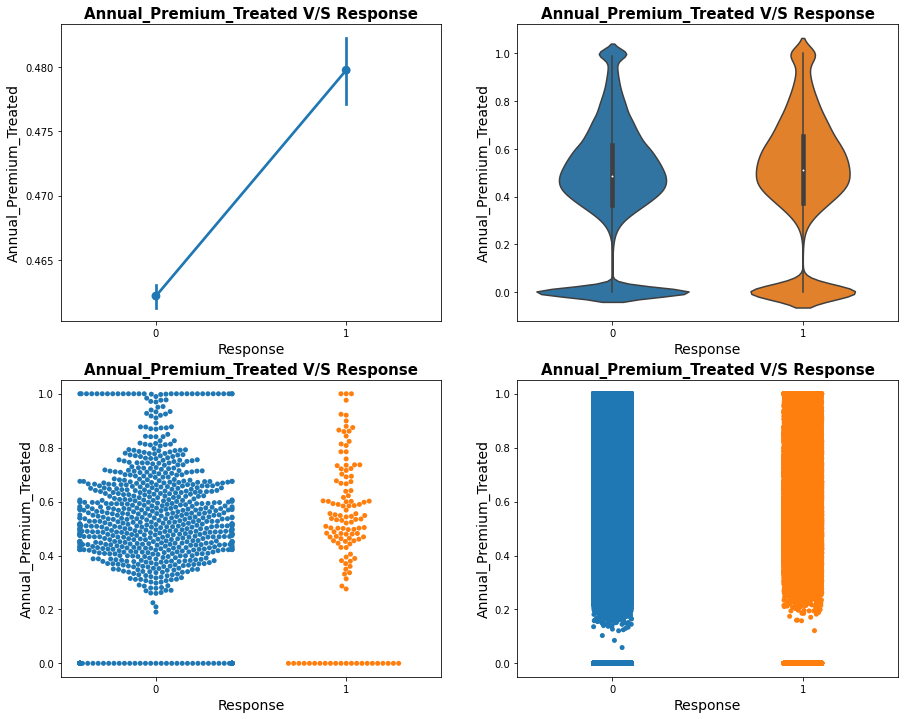

In [ ]:
show_annual_premium_relation(data_df)

**Observations:**
- From the point plot, we can say that if the *Annual_Premium* is more then they are more likely to take the vehicle insurance.
- Second plot also shows the same thing with violin plot.
- Third plot shows the plattern of responses based on *Annual_Premium*.
- Fourth plot is the strip plot for *Annual_Premium* and *Responses*.

## **Annual Premium and Age**
---

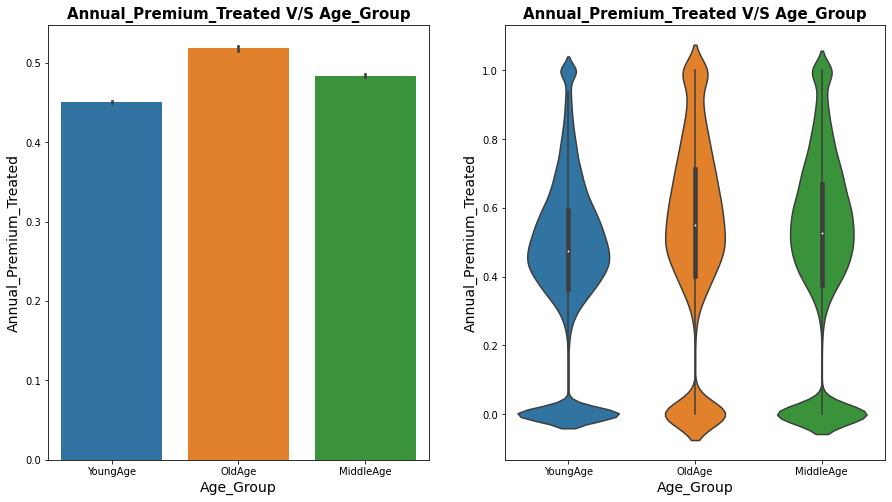

In [ ]:
show_annual_premium_with_age_group(data_df)

- The above two plots, bar and violin, shows the distribution of *Annual_Premium* on the basis of *Age_Group*.

In [ ]:
show_age_annual_premium_relation(data_df)

**Observations:**
- First plot shows the *Annual_Premium* of people based on their *Age*.
- Second plot shows the same but the data points are categorized by *Region_Code*.

## **Age Group**
---

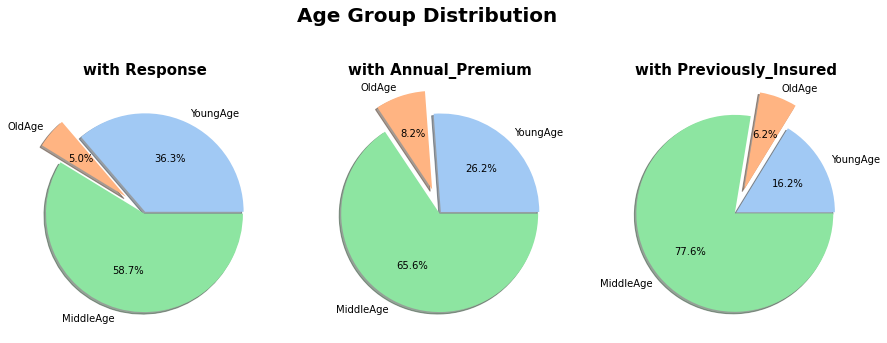

In [ ]:
age_group_distribution(data_df)

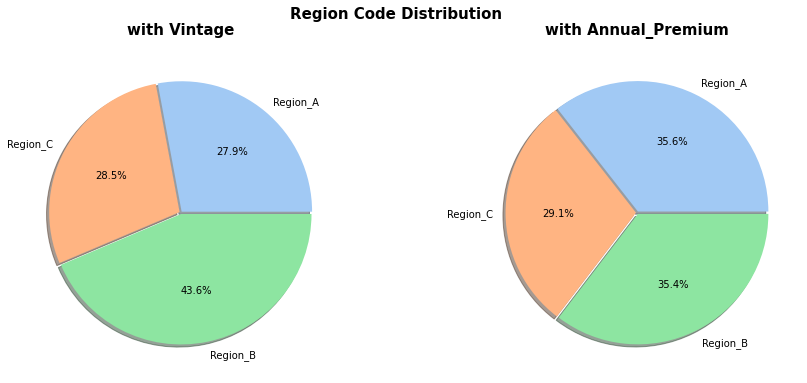

In [ ]:
show_region_code_distribution(data_df)

**Observations:**
- The above three pie plots shows the distribution of Age_Group in the Data set based on *Response*, *Annual_Premium* and *Previously_Insured*.
- The above two pie plots shows the distribution of *Region_Code* in the Data set based on *Vintage* and *Annual_Premium*.

## **Exploring Policy Sales Channel**
---

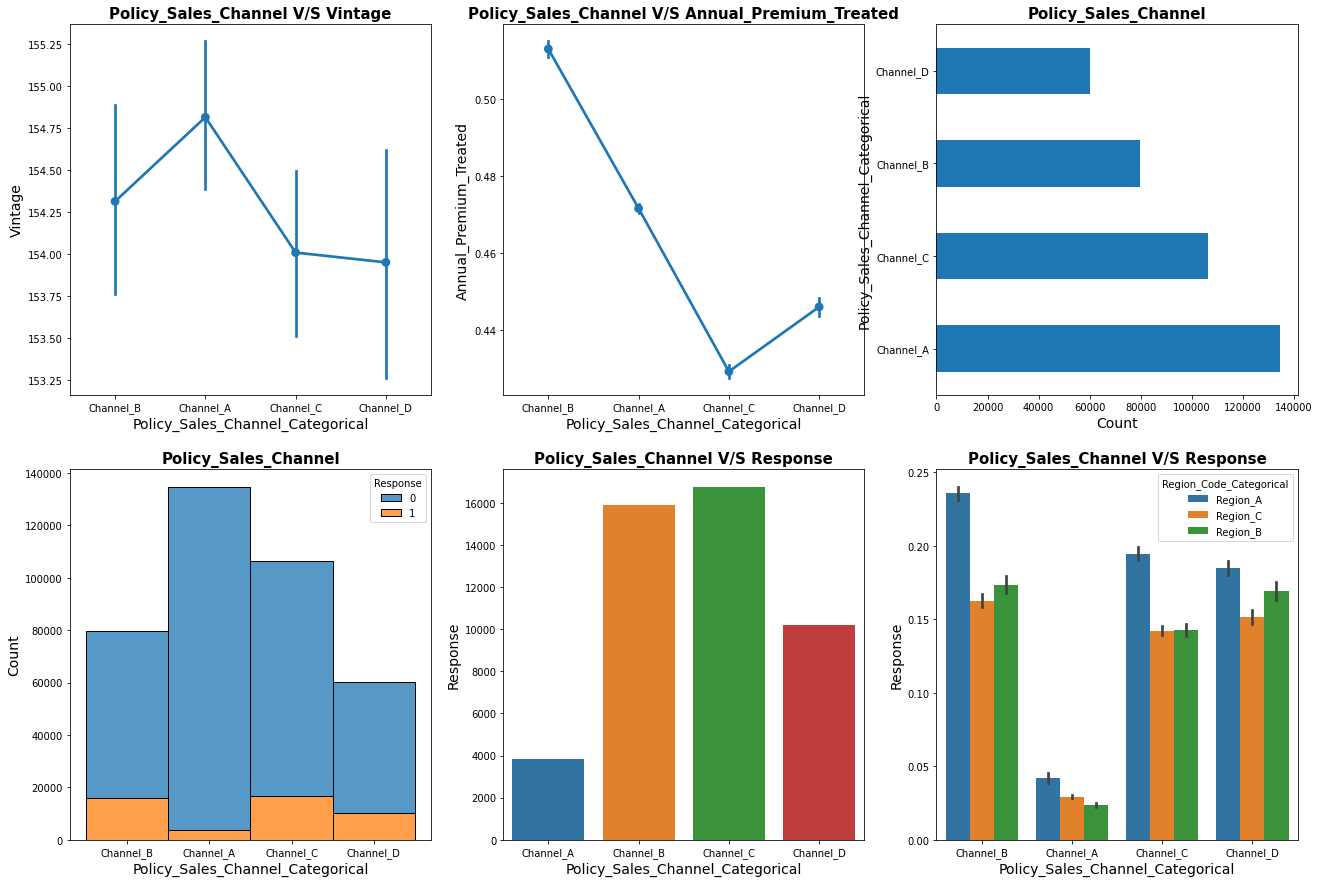

In [ ]:
show_policy_sales_channel_relation(data_df)

**Observations:**
- The two point plots shows the distribution of *Policy_Sales_Channel* based on *Vintage* and *Annual_Premium_Treated*.
- The next three bar plots shows the number of data points belonging to a particular channel based on *Responses*.
- The last bar plot shows the probability of a customer taking vehicle insurance based on *Policy_Sales_Channel* and *Region_Code*.

## **Distribution Plots based on Features**
---

- The below plots shows the distribution of data points based on different features.

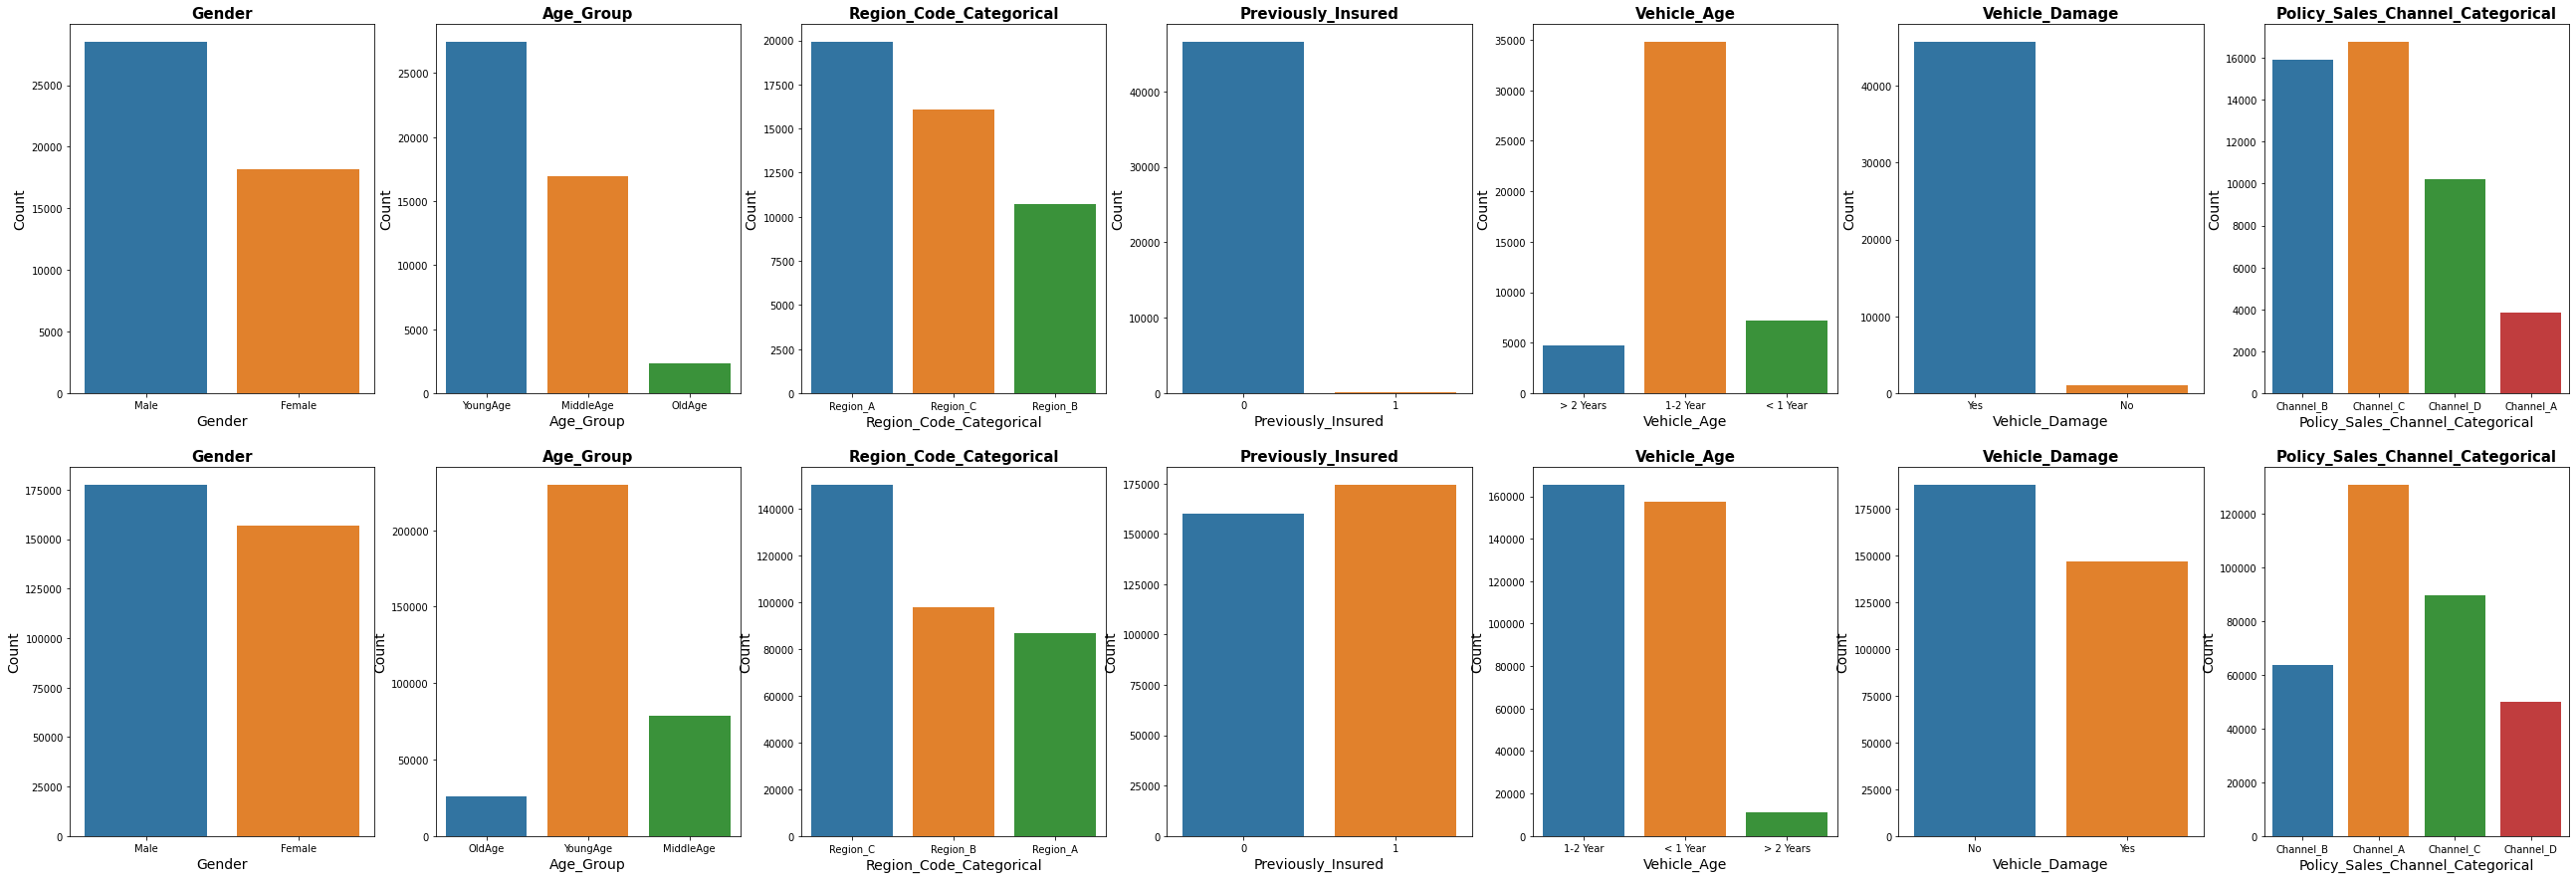

In [ ]:
count_each_categorical_feature(data_df)

### **Dropping Extra Columns**
---
- As we have already categorized 'Age', 'Region_Code', 'Annual_Premium',
'Policy_Sales_Channel', 'Vintage' features in our data set so we can now drop these features.
- We can also drop 'ID' and 'Driving_License' as they are not providing any valuable information.

In [ ]:
data_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_Treated',
       'Vintage_Treated', 'Age_Group', 'Policy_Sales_Channel_Categorical',
       'Region_Code_Categorical'],
      dtype='object')

In [ ]:
# Dropping Unnecessary Columns
cols_to_drop = ['id', 'Age', 'Driving_License',
                'Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']
data_df.drop(columns = cols_to_drop, inplace = True)

# **Feature Selection**
---

## **Numeric Feature Selection**

Let's see the Kendall's correlation between numerical features.

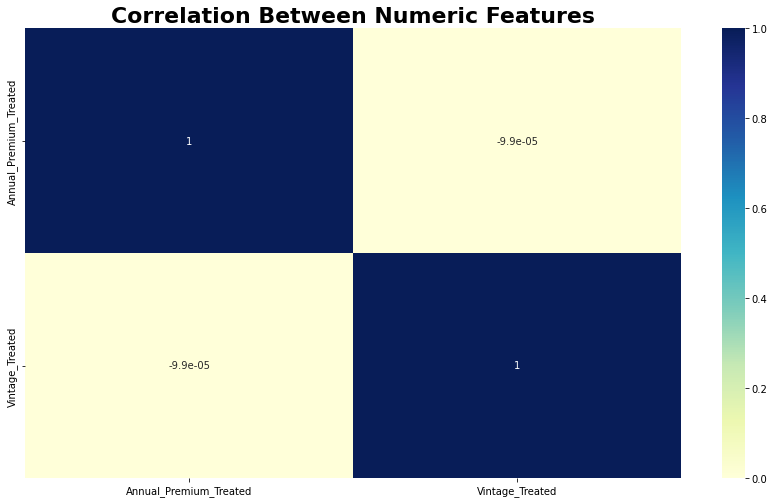

In [ ]:
def numeric_feature_selection(df):
    plt.rcParams['figure.figsize'] = 14.7,8.27
    numeric_features = ['Annual_Premium_Treated','Vintage_Treated']

    sns.heatmap(df[numeric_features].corr(method = 'kendall'),
                cmap="YlGnBu",annot=True)
    plt.title('Correlation Between Numeric Features', fontdict={'fontsize':22,'fontweight':'bold'})
    
numeric_feature_selection(data_df)

We have got two numeric features - Annual_Premium_Treated and Vintage_Treated

*   There is no correlation between these two features, as a result we are going to move forward with both of them. 


## **Categorical Features**

Let's see the feature importance of categorical features.

In [ ]:
categorical_features = ['Gender','Age_Group','Region_Code_Categorical','Previously_Insured',
                        'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel_Categorical']

In [ ]:
def make_features_numeric(df):
    global numeric_df
    numeric_df = df.copy()
    numeric_df['Gender'] = numeric_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    numeric_df['Age_Group'] = numeric_df['Age_Group'].apply(lambda x: 1 if x == 'YoungAge' else 2 if x == 'MiddleAge' else 3)
    numeric_df['Vehicle_Age'] = numeric_df['Vehicle_Age'].apply(lambda x: 1 if x == 'New' else 2 if x == 'Latest' else 3)
    numeric_df['Vehicle_Damage'] = numeric_df['Vehicle_Damage'].apply(lambda x: 0 if x == 'Y' else 1)
    numeric_df['Policy_Sales_Channel_Categorical'] = numeric_df['Policy_Sales_Channel_Categorical'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 3 if x=='C' else 4)
    numeric_df['Region_Code_Categorical'] = numeric_df['Region_Code_Categorical'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 3)

make_features_numeric(data_df)

### **Mutual Information**
Mutual information is one of many quantities that measures how much one random variables tells us about another.

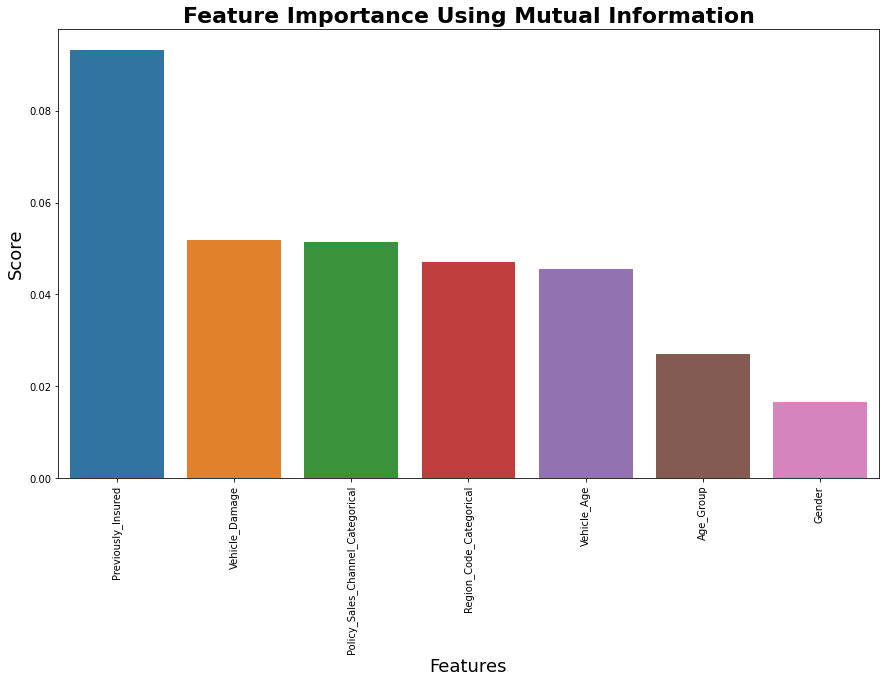

In [ ]:
def mutual_info(df):
    X = df.copy()
    y = X.pop("Response")
    X.drop(columns = ['Annual_Premium_Treated','Vintage_Treated'], inplace = True)
    
    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

    high_score_features = []
    feature_scores = mutual_info_classif( x_train, y_train,  random_state=0)

    column_score = {}
    columns = []
    scores = []
    for score, f_name in sorted(zip(feature_scores, x_train.columns), reverse=True):
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    column_score['Feature'] = columns
    column_score['Score'] = scores

    return pd.DataFrame(data = column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)

show_feature_importance_through_mi(numeric_df)

- From the above bar plot, we can conclude Previously_Insured is the most important feature and has the highest impact on dependent feature.

# **One-Hot Encoding**
---

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

When there is not a ordinal relationship between variables, we use One-Hot Encoding. With One-Hot Encoding the model doesn't assume a natural ordering between categories which may result in poor performance or unexpected results.

In [ ]:
data_df.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Response', 'Annual_Premium_Treated', 'Vintage_Treated', 'Age_Group',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical'],
      dtype='object')

In [ ]:
cols_to_encode = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
                  'Age_Group','Policy_Sales_Channel_Categorical', 'Region_Code_Categorical']

data_df = pd.get_dummies(data = data_df, columns=cols_to_encode)
data_df.head()

,Response,Annual_Premium_Treated,Vintage_Treated,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Age_Group_MiddleAge,Age_Group_OldAge,Age_Group_YoungAge,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C
0,1,0.638245,0.716263,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0
1,0,0.521510,0.598616,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,1,0.601797,0.058824,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0
3,0,0.438540,0.667820,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1
4,0,0.419591,0.100346,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0


*So, here we are done with the Feature Selection part of our dataset. Let's train the dataset on different Machine Learning Algorithms.*

# **Machine Learning Algorithms**
---


Let's apply different Machine Learning Models to our data set and see how each of them performs. Firstly, We will tune the hyper-parameters of those models and then we will compare and choose the best model among them, based on Elapsed Time and Evaluation Metrics of the best parameters. 

List of **Machine Learning Models** we are going to train and evaluate our data set on:
- Decision Tree
- Gaussian Naive Bayes
- AdaBoost Classifier
- Bagging Classifier
- LightGBM
- Logistic Regression

###**Hyper-Parameter Tuning Methods:**

We have tried different hyper-parameter tuning methods. Every method gave the same result but **GridSearchCV** and **RandomizedSearchCV** took a huge amount of time to train the models. **HalvingRandomizedSearchCV** took the least time to train the models and predict the output. That's why we highly ***recommend*** you to keep the Tuning_Method as Halving_Randomized_Search_CV from the drop-down menu below.

We have also added some results of the model tuning with GridSearchCV and RandomizedSearchCV, just for performance comparison.

#### **Tuning Methods:**
- HalvingRandomizedSearchCV
- GridSearchCV
- RandomizedSearchCV

### **Evaluation Metrics:**
- Accuracy Score
- Precision
- Recall
- F1 Score
- ROC AUC Score
- Log Loss

### **Plots:**

At the end of every model's hyper-parameter tuning, there is one **ROC Curve** which shows the ROC Scores and **Parallel Coordinates Plot** which shows all the combinations of hyper-parameters used for tuning the model to get the best parameters.


*Let's get started...!*

In [ ]:
def plot_confusion_matrix_and_roc_curves(model, X_test, y_test, y_pred):

    fig, axes = plt.subplots(1,2, figsize=(22,5))

    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, ax = axes[0], annot=labels, fmt='',cmap='Blues')
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})

    # predict probabilities
    pred_proba = model.predict_proba(X_test)

    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.subplot(1, 2, 2)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)

    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})

    plt.legend(loc='best')
    plt.show()


def visualization(results_df, parameters):    

    def shorten_param(param_name):
        if "__" in param_name:
            return param_name.rsplit("__", 1)[1]
        return param_name

    column_results = [f"param_{name}" for name in parameters.keys()]
    column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

    results_df = results_df[column_results].sort_values("mean_test_score", ascending=False)
    results_df = results_df.rename(shorten_param, axis=1)

    for col in results_df.columns:
        if col == 'param_random_state':
            continue
        try:
            results_df[col] = results_df[col].astype(np.float64)
        except:
            continue

    fig = px.parallel_coordinates(
    results_df,
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Hyper Parameter Tuning',)
    fig.show()


def evaluation_metrics(name, independent_feature_length , y_pred, y_test):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)] #Log Loss

    metrics_df = pd.DataFrame(metrics_dict)

    print(metrics_df)


def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )
    
    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'accuracy', cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_mode = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', n_jobs=-1, cv = 3)

    
    start_time = time.time() 
    
    tuned_model.fit(x_train, y_train)
    
    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)

    return tuned_model


def perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model):
    print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)

    model.fit(x_train, y_train)
    untuned_pred = model.predict(x_test)

    # Evaluation Metrics before tuning
    print(f'\nEvaluation of {type(model).__name__} before tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__, len(list(x_train.columns)), untuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(model, x_test, y_test, untuned_pred)

    # Hyper-parameter tuning
    tuned_model = hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model)
    tuned_pred = tuned_model.predict(x_test)
  
    # Evaluation Metrics after tuning
    print(f'\nEvaluation of {type(model).__name__} after tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__,len(list(x_train.columns)), tuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(tuned_model.best_estimator_, x_test, y_test, tuned_pred)
    visualization(pd.DataFrame(tuned_model.cv_results_), parameters)


def ml_algorithm_implementation(df, model, parameters, tuning_model, feature_importance = False):

    if feature_importance == False:
        print('########'*8+'\n     <<<< '+f'Tuning Model: {tuning_model}'+' >>>>\n'+'********'*8)

    x = data_df.iloc[:,1:]
    y = data_df['Response']

    # Train Test Split             
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=57)

    if feature_importance == True:
        model.fit(x_train, y_train)
        return x_train, y_train, model

    perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model)

In [ ]:
#@title Keep it Halving_Randomized_Search_CV!! Other methods are time consuming.
Tuning_Method = "Halving_Randomized_Search_CV" #@param ["Halving_Randomized_Search_CV", "Grid_Search_CV", "Randomized_Search_CV"]

## **Comparison Between Different Tuning Techniques:**

GridSearchCV:

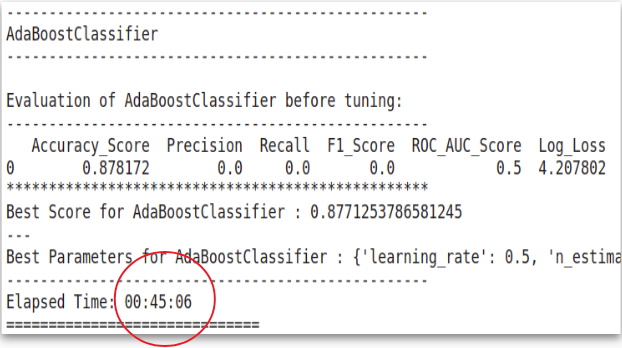



RandomizedSearchCV:

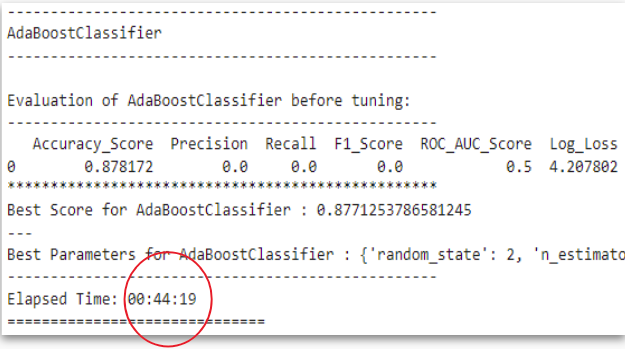


HalvingSearchCV:

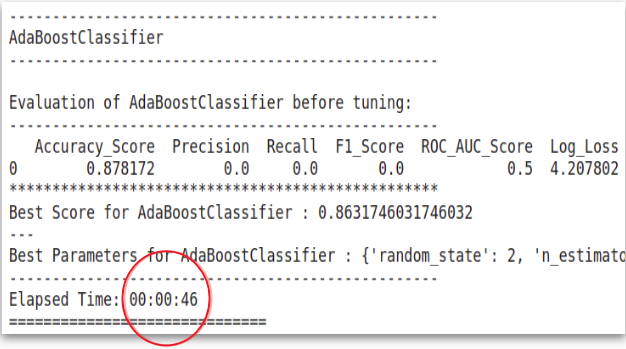


## **Decision Tree**
---
Decision tree is the most powerful and popular tool for *classification* and *prediction*. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

### ***Hyper-Parameter Tuning:***

> **splitter:** The strategy used to choose the split at each node.

> **max_depth:** The maximum depth of the tree.

> **min_samples_leaf:** The minimum number of samples required to be at a leaf node.

> **min_weight_fraction_leaf:** The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

> **max_features:** The number of features to consider when looking for the best split.

> **max_leaf_nodes:** Grow a tree with max_leaf_nodes in best-first fashion.

> **random_state:** Controls the randomness of the estimator.

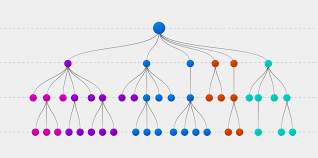

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
DecisionTreeClassifier
--------------------------------------------------

Evaluation of DecisionTreeClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.824994    0.27807  0.273458  0.275745       0.587483  6.044574



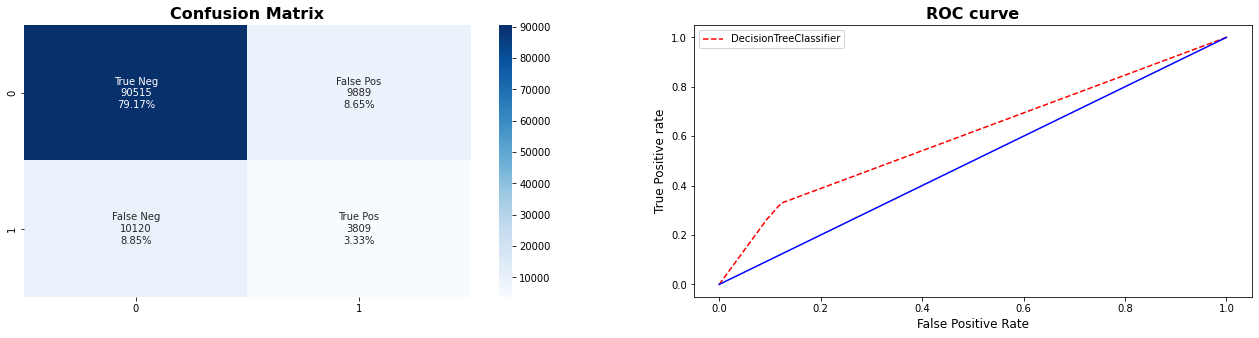

**************************************************
Best Score for DecisionTreeClassifier : 0.8763718296727145 
---
Best Parameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 23, 'min_weight_fraction_leaf': 0.5, 'min_samples_leaf': 5, 'max_leaf_nodes': 40, 'max_features': 'sqrt', 'max_depth': 5}
--------------------------------------------------
Elapsed Time: 00:04:19

Evaluation of DecisionTreeClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.207802



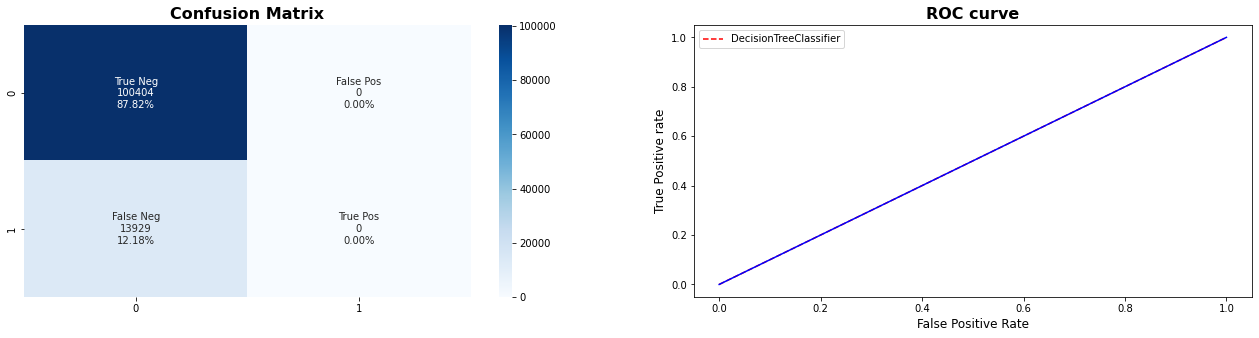

In [ ]:
parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[23]}

ml_algorithm_implementation(data_df, DecisionTreeClassifier(), parameters_decision_tree, Tuning_Method, False)

## **Gaussian Naive Bayes**
---
Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality.

### ***Hyper-Parameter Tuning:***

> **var_smoothing:** Portion of the largest variance of all features that is added to variances for calculation stability.

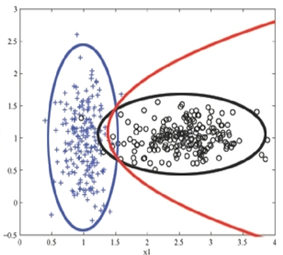

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
GaussianNB
--------------------------------------------------

Evaluation of GaussianNB before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score   Log_Loss
0        0.687571   0.268878  0.910044   0.41511       0.783375  10.791173



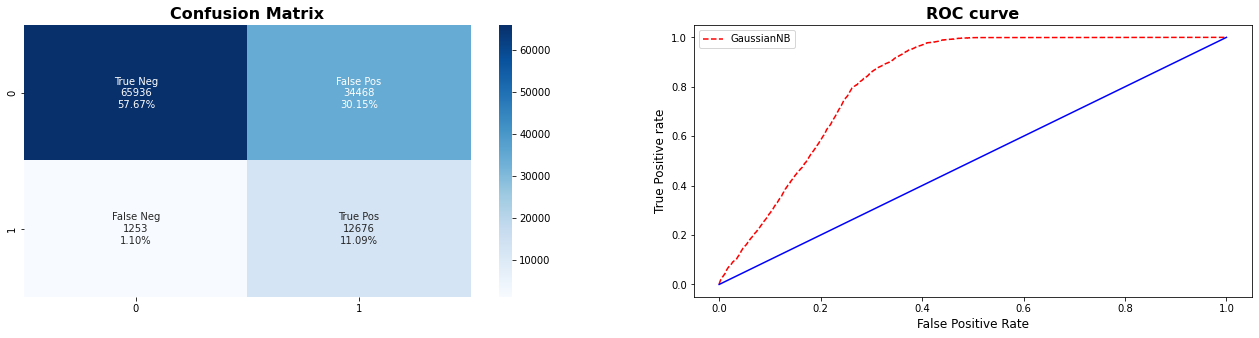

**************************************************
Best Score for GaussianNB : 0.692433971639338 
---
Best Parameters for GaussianNB : {'var_smoothing': 0.1873817422860384}
--------------------------------------------------
Elapsed Time: 00:00:09

Evaluation of GaussianNB after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score   Log_Loss
0        0.689337   0.269544  0.906454  0.415527       0.782835  10.730149



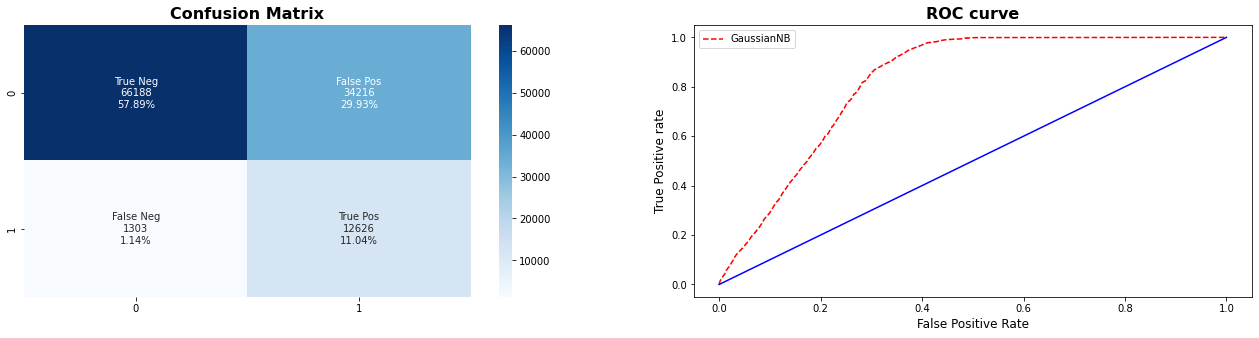

In [ ]:
parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

ml_algorithm_implementation(data_df, GaussianNB(), parameters_NB, Tuning_Method, False)

## **AdaBoost Classifier**
---
AdaBoost algorithm, short for *Adaptive Boosting*, is a *Boosting* technique used as an *Ensemble Method* in Machine Learning. It is called *Adaptive Boosting* as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

### ***Hyper-Parameter Tuning:***

> **n_estimators:** The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

> **learning_rate:** Weight applied to each classifier at each boosting iteration.

> **random_state:** Controls the randomness of the estimator.

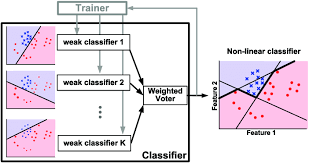

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
AdaBoostClassifier
--------------------------------------------------

Evaluation of AdaBoostClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.207802



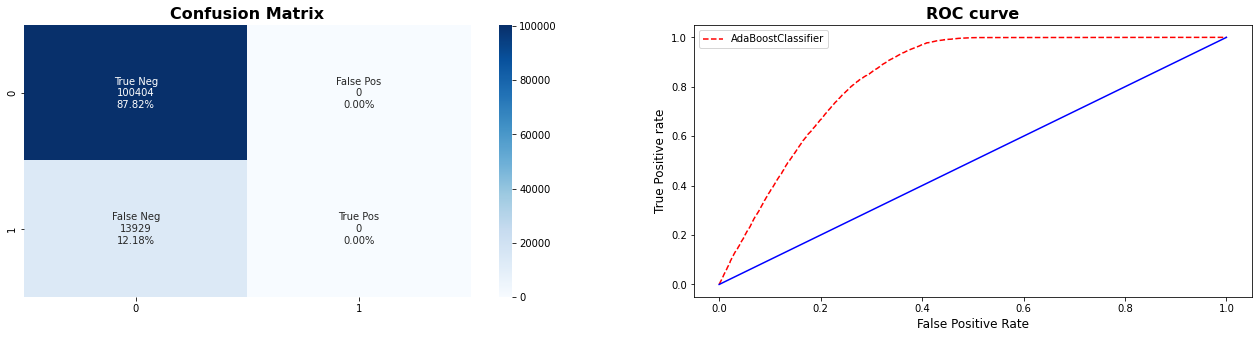

**************************************************
Best Score for AdaBoostClassifier : 0.8633333333333333 
---
Best Parameters for AdaBoostClassifier : {'random_state': 2, 'n_estimators': 10, 'learning_rate': 0.01}
--------------------------------------------------
Elapsed Time: 00:00:29

Evaluation of AdaBoostClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.207802



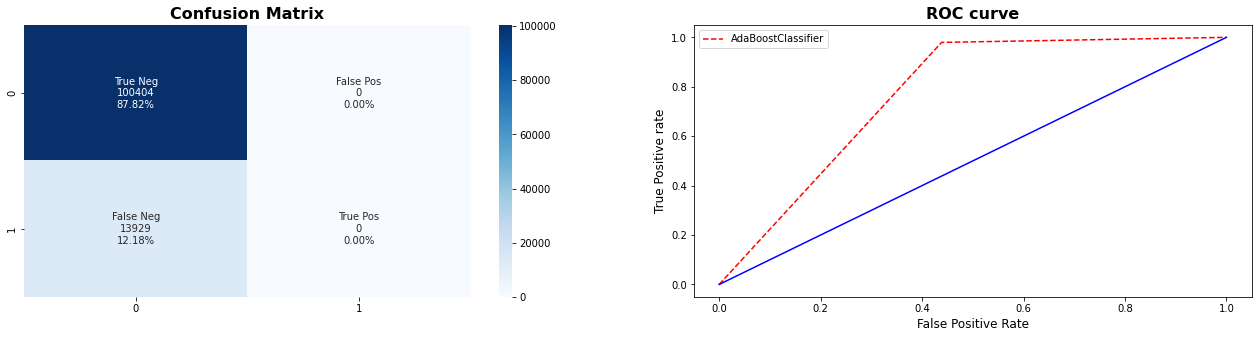

In [ ]:
parameters_ada = {'n_estimators':[10, 100, 200,400],
              'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
              'random_state':[2]}

ml_algorithm_implementation(data_df, AdaBoostClassifier(), parameters_ada, Tuning_Method, False)

## **Bagging Classifier**
---
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

### ***Hyper-Parameter Tuning:***

> **n_estimators:** The maximum number of estimators at which boosting is terminated.

> **random_state:** Controls the randomness of the estimator.

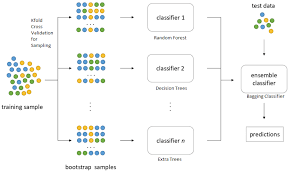

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
BaggingClassifier
--------------------------------------------------

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.853647    0.30408  0.156221  0.206403       0.553311  5.054895



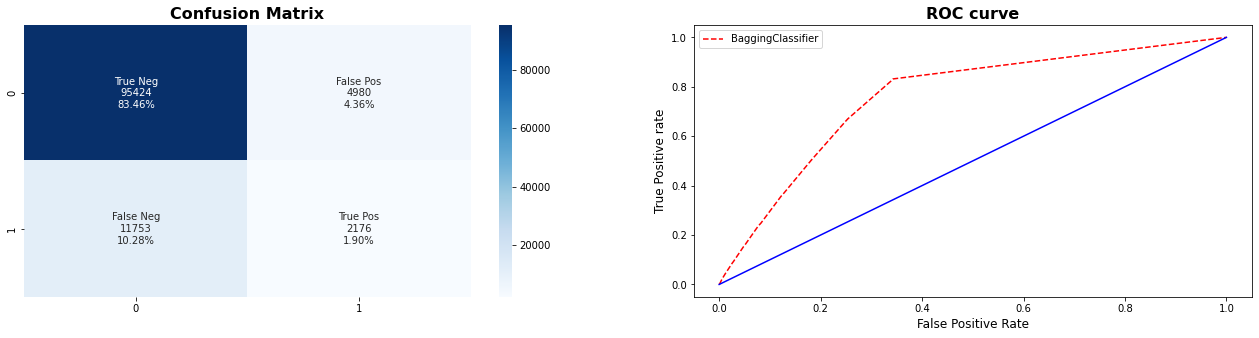

**************************************************
Best Score for BaggingClassifier : 0.8727272727272728 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 10}
--------------------------------------------------
Elapsed Time: 00:00:20

Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision   Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.853349   0.303517  0.15737  0.207272       0.553636  5.065167



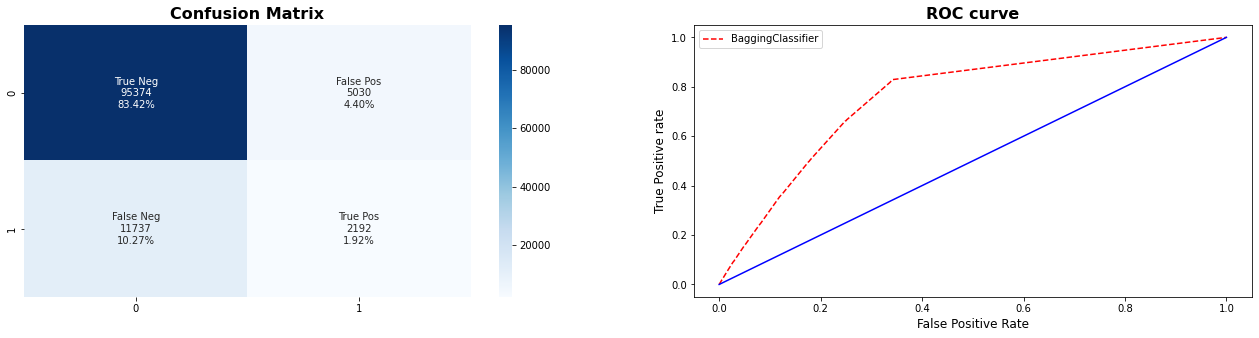

In [ ]:
parameters_bagging = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[26]}

ml_algorithm_implementation(data_df, BaggingClassifier(), parameters_bagging, Tuning_Method, False)

## **LightGBM Classifier**
---
LightGBM, short for Light Gradient Boosting Machine, is a *distributed gradient boosting framework*.It uses Histogram based splitting, Gradient-based One-Side Sampling (GOSS) ans Exclusive Feature Bundling (EFB) making it a fast algorithm.

### ***Hyper-Parameter Tuning:***

> **n_estimators:** Number of Boosting iterations.

> **learning_rate:** This setting is used for reducing the gradient step. It affects the overall time of training: the smaller the value, the more iterations are required for training.

> **min_data_in_leaf:** Minimal number of data in one leaf. Can be used to deal with over-fitting

> **random_state:** Controls the randomness of the estimator.

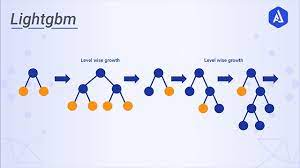

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LGBMClassifier
--------------------------------------------------

Evaluation of LGBMClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878215   0.545455  0.002154  0.004291       0.500952  4.206292



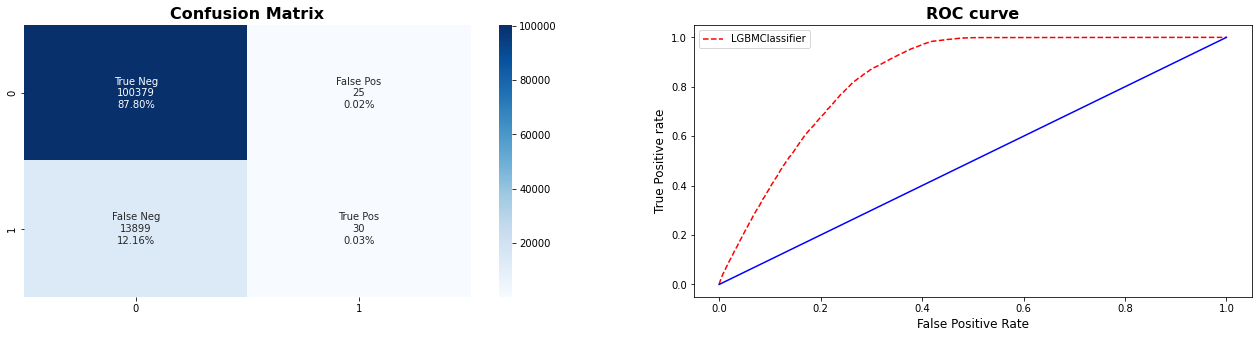

**************************************************
Best Score for LGBMClassifier : 0.8749999411774395 
---
Best Parameters for LGBMClassifier : {'n_estimators': 100, 'min_data_in_leaf': 250, 'max_depths': 3.0, 'learning_rate': 0.001}
--------------------------------------------------
Elapsed Time: 00:03:35

Evaluation of LGBMClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.207802



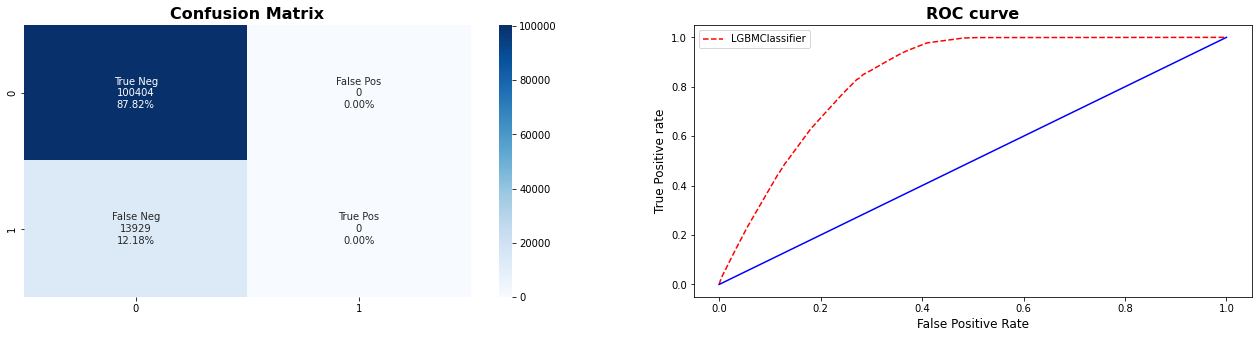

In [ ]:
parameters_lightgbm = {
    'max_depths': np.linspace(1, 32, 32, endpoint=True),
    'min_data_in_leaf':[100, 200, 250, 300],
    'n_estimators':[50,100, 120,150,200],
    'learning_rate':[.001,0.01,.1]
}

ml_algorithm_implementation(data_df, lgb.LGBMClassifier(), parameters_lightgbm, Tuning_Method, False)

## **Logistic Regression**
---
The logistic classification model is a binary classification model in which the conditional probability of one of the two possible realizations of the output variable is assumed to be equal to a linear combination of the input variables, transformed by the logistic function.

### ***Hyper-Parameter Tuning:***

> **solver:** Algorithm to use in the optimization problem.

> **penalty:** Specify the norm of the penalty.

> **C:** Inverse of regularization strength

> **random_state:** Controls the randomness of the estimator.

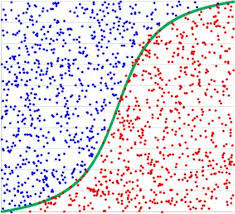

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LogisticRegression
--------------------------------------------------

Evaluation of LogisticRegression before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.207802



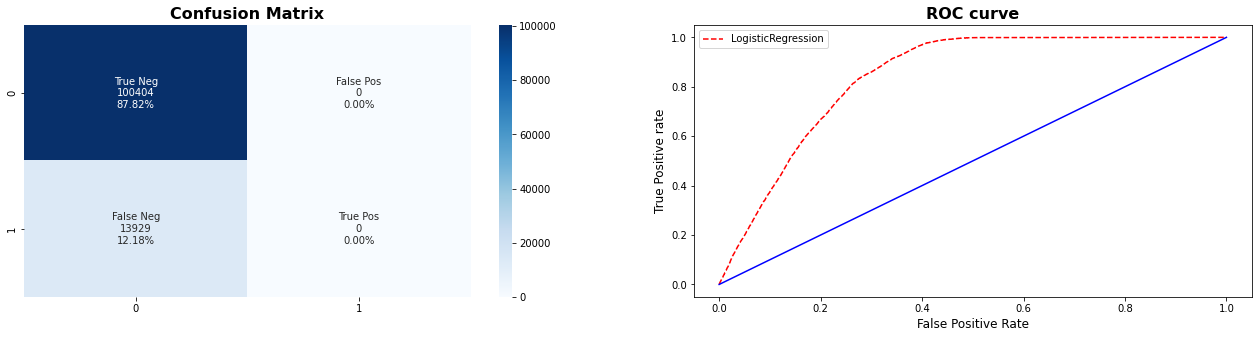

**************************************************
Best Score for LogisticRegression : 0.8750259605399793 
---
Best Parameters for LogisticRegression : {'solver': 'sag', 'random_state': 2, 'penalty': 'l2', 'C': 0.001}
--------------------------------------------------
Elapsed Time: 00:00:06

Evaluation of LogisticRegression after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.207802



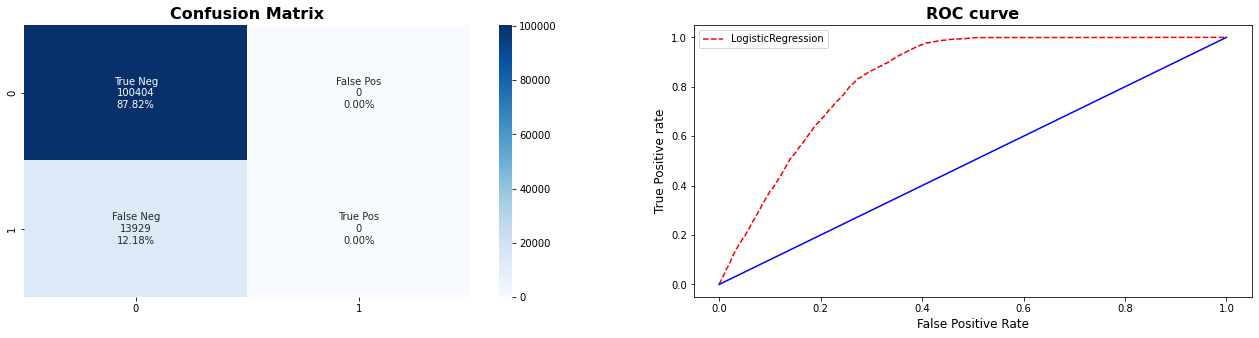

In [ ]:
parameters_logistic = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                        'penalty' : ['l2'],
                        'C' : [100, 10, 1.0, 0.1, 0.01, 0.001], 
                       'random_state':[2]}

ml_algorithm_implementation(data_df, LogisticRegression(), parameters_logistic, Tuning_Method, False)

## **Best Model**
---
From all the above models that we tried to train and predict the output, we can conclude that ***Bagging Classifier*** is the best model for our data set. The best parameter of this model is {'n_estimators': 200}. Its Accuracy Score is 0.85, Precision is 0.31, Recall is 0.15, F1_Score is 0.20, ROC_AUC_Score is 0.55 and Log_Loss is 4.98. Its Elapsed time is 03 minutes and 21 seconds.

We can see that we have other models with higher Accuracy Score than *Bagging Classifier*. But the problem with those models is, their Precision and Recall values are zero which means True Positives are zero. That means those models are unable to predict correct output if any customer is ready to take vehicle insurance. And as we all know, classification accuracy alone can be misleading if you have an unequal number of observations in each class. This is exactly the case with our data set.

*Hence, **Bagging Classifier** is the **best model** for our data set.*

**NOTE:** You might get a slight difference in result every time you run because we are using *Halving_Randomized_Search_CV* to perform hyperparameter tunning which randomly selects the combination of parameters to tune the model.

# **Extracting Feature Importance**
---

We got our best model with its hyper-parameter values. Let's have a look at the feature importance of our data set.

In [ ]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

def show_feature_importance():
    x_train, y_train, model = ml_algorithm_implementation(data_df, BaggingClassifier(n_estimators=200, random_state=23), 
                                None, None, True)
    
    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances, x_train, y_train)

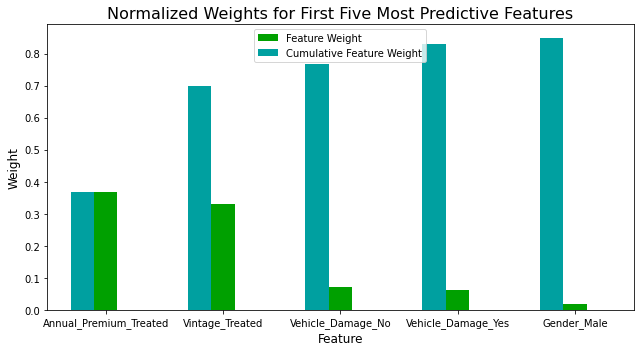

In [ ]:
show_feature_importance()

**Observations:**
- Annual_Premium_Treated has impacted the most in the prediction.
- Gender_Male has highest feature weight but less cumulative weight.

# **Conclusion**
---

Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process by ML algorithms.

Through **Exploratory Data Analysis**, we categorized *Age* as YoungAge, MiddleAge, and OldAge, then we categorized the *Region_Code* as Region_A, Region_B, Region_C. We categorized the *Policy_Sales_Channel* into channel_A, channel_B, channel_C. Further, we observed that customers belonging to youngAge are more interested in vehicle response. We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having  damaged vehicles are more likely to be interested in vehicle insurance.

For **Feature Selection**, we used Kendall's rank correlation coefficient for numerical features and for categorical features, we applied the Mutual Information technique. Here we observed that Previously_Insured is the most important feature and has the highest impact on the dependent feature and there is no correlation between the two numeric features

Further, we applied **Machine Learning Algorithms** to determine whether a customer would be interested in Vehicle Insurance. For the *Naive Bayes* algorithm, we got an accuracy score of 68% and after hyperparameter tuning, the accuracy score increased to 72%. Similarly, for *Decision Tree Classifier, AdaBoost, BaggingClassifier, LightGBM* accuracy score was obtained around 82%-87%. So, we selected our ***best model*** as the model with an accuracy score of ***85%*** considering precision and recall as we have an unequal number of observations in each class in our dataset, so accuracy alone can be misleading.

*That’s it! We reached the end.*


---